### Introduction
 Mtembezi Safaris is a travel company that want to venture into the airtravel business. they are stuggling on what kind of aircraft to purchase for their business as they are new in this industry.

with the information on the CSV files in the data folder, which try and paint a picture of all the accidents that have occured in United States and the international waters from 1962 - 2023.
it has information on the different conditions during the accidents such as:
1. longitudes and latitudes,
2. weather conditions
3. was the aircraft commercial or students flights
4. accident happened during take off, landing or while cruising
5

analysis of th

### 1. SET UP THE ENVIRONMENT
we will first import all the relevant libraries will need to use during our analysis with their standard alias.
i will use:
1. pandas
2. matplotlib.pyplot
3. numpy
4. seaborn

In [6]:
#import libraries with standard alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
### 2. LOAD THE DATASET
# will read into the csv file and store it in a variable called df and print out the first 5 rows to check out data and columns contained
df = pd.read_csv('Data/AviationData.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
# to display all columns in the dataframe

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8564\2005587428.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 3. UNDERSTAND THE DATA
We will do alittke explotrartion to understand the data we have and what it contains to check what we are working with.

In [ ]:
# remove any "-" and replacing with NaN values
df.replace("-", np.nan, inplace=True)

#checking the data info in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50247 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [ ]:
#calculating measure of central tendancies in the numerical columns in the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
#checking the names of the columns in the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
#check the shape and no rows of the dataframe
df.shape

(88889, 31)

The data set is a dataframe that has 8889 rows and 31 columns with some have null values. we are futher going to clean the data to remove the null values, duplicates and any anomalies before we can find the measure of central tendancies of our data. with most data being objects and floats.
Columns with Numerical data are 5.

### 3. REDUCING THE COLUMNS
The columns in the dataframe are 31 and some are irrelevant to the goal of my study. i will reduce the number of columns to 12 columns to include;
i. Event date - Important as it will tell when the accident coccured.
ii. Location/Country - Where the accident occurred.
iii. Make/Model - This is key as the main objective of the study is to determine an aircraft to purchase, one that is safe and not prone to accidents.
iv. Injury sevierity/Total Fatal, minor and no Injuries - To check on the injuries.
v. Aircraft Damage - The extent of the damage of the aircraft. Can it be salvaged after the accident? this is also key.
vi. Broad phase of the flight - This shows when the flight was involved in the accident, was it landing or taking off.
vii. Weather Conditions
viii. Purpose of flight - Was the flight personal or commercial.
This 12 columns will help paint a better picture for my client thus helping them make a better decision.

In [9]:
# Creating a copy of the dataframe with relevant columns to be used in the analysis
Aviation_Analysisdf = df[['Event.Date', 'Location', 'Country', 'Make', 'Model', 'Total.Fatal.Injuries', 'Total.Minor.Injuries','Total.Uninjured','Aircraft.damage','Broad.phase.of.flight', 'Weather.Condition','Purpose.of.flight']]
Aviation_Analysisdf.info()
Aviation_Analysisdf.shape
Aviation_Analysisdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             88889 non-null  object 
 1   Location               88837 non-null  object 
 2   Country                88663 non-null  object 
 3   Make                   88826 non-null  object 
 4   Model                  88797 non-null  object 
 5   Total.Fatal.Injuries   77488 non-null  float64
 6   Total.Minor.Injuries   76956 non-null  float64
 7   Total.Uninjured        82977 non-null  float64
 8   Aircraft.damage        85695 non-null  object 
 9   Broad.phase.of.flight  61724 non-null  object 
 10  Weather.Condition      84397 non-null  object 
 11  Purpose.of.flight      82697 non-null  object 
dtypes: float64(3), object(9)
memory usage: 8.1+ MB


,Event.Date,Location,Country,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight,Weather.Condition,Purpose.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,108-3,2.0,0.0,0.0,Destroyed,Cruise,UNK,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,PA24-180,4.0,0.0,0.0,Destroyed,Unknown,UNK,Personal
2,1974-08-30,"Saltville, VA",United States,Cessna,172M,3.0,NaN,NaN,Destroyed,Cruise,IMC,Personal
3,1977-06-19,"EUREKA, CA",United States,Rockwell,112,2.0,0.0,0.0,Destroyed,Cruise,IMC,Personal
4,1979-08-02,"Canton, OH",United States,Cessna,501,1.0,NaN,0.0,Destroyed,Approach,VMC,Personal


### Data Cleaning
Will convert the data in the event column to proper date format and  remove all missing data

In [23]:
Aviation_Analysisdf = Aviation_Analysisdf.copy()

In [24]:
#converting date on event.date column to datetime format.
Aviation_Analysisdf['Event.Date'] = pd.to_datetime(Aviation_Analysisdf['Event.Date'], errors='coerce')


In [25]:
#checking for missing values in the dataframe
Aviation_Analysisdf.isnull().sum()

Event.Date               61724
Location                    14
Country                      0
Make                        11
Model                       30
Total.Fatal.Injuries         0
Total.Minor.Injuries         0
Total.Uninjured              0
Aircraft.damage              0
Broad.phase.of.flight        0
Weather.Condition            0
Purpose.of.flight            0
dtype: int64

In [26]:
#see the data with the most missing values to be dropped
Aviation_Analysisdf.isnull().sum().sort_values(ascending=False)

Event.Date               61724
Model                       30
Location                    14
Make                        11
Country                      0
Total.Fatal.Injuries         0
Total.Minor.Injuries         0
Total.Uninjured              0
Aircraft.damage              0
Broad.phase.of.flight        0
Weather.Condition            0
Purpose.of.flight            0
dtype: int64

In [27]:
#percentage of missing values in the dataframe
missing_percent = Aviation_Analysisdf.isnull().mean().sort_values(ascending = False) * 100

## create a bar graph of the missing data
the Bar graph will help clearly see data with missing values and give actions on weather to drop or fill

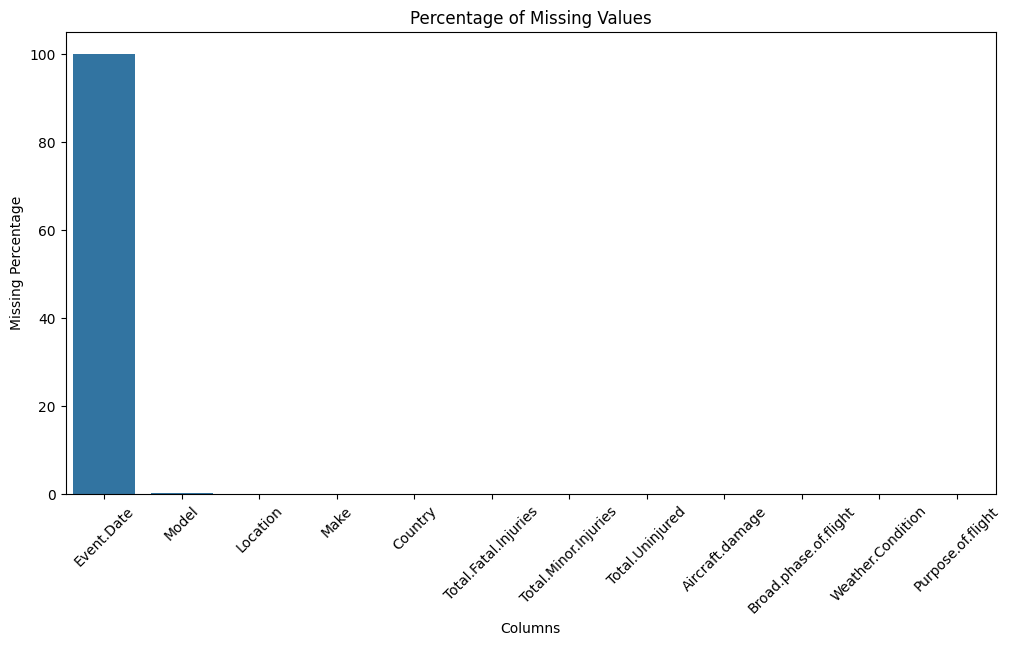

In [28]:
#creating a bar plot to visualize the percentage of missing values in the dataframe
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.show()

In [29]:
#drop missing data in Broad.phase.of.flight
Aviation_Analysisdf.dropna(subset=['Broad.phase.of.flight'], inplace=True)

In [30]:
#filling missing values in the Total.Fatal.Injuries, Total.Minor.Injuries, and Total.Uninjured columns with '0'
Aviation_Analysisdf['Total.Fatal.Injuries'].fillna(0, inplace=True)
Aviation_Analysisdf['Total.Minor.Injuries'].fillna(0, inplace=True)
Aviation_Analysisdf['Total.Uninjured'].fillna(0, inplace=True)

In [31]:
#fill missing values in the Aircraft.damage, purpose.of.flight, weather.condition and country columns with 'Unknown'
Aviation_Analysisdf['Aircraft.damage'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Purpose.of.flight'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Weather.Condition'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Country'].fillna('Unknown', inplace=True)